## 1. Introduction

In this project, the objective is to forecast the future prices of the S&P 500 index using a combination of statistical and deep learning models. The S&P 500 is a widely-followed stock market index that measures the performance of 500 of the largest companies listed on stock exchanges in the United States. Accurate forecasting of its prices is crucial for investors, financial analysts, and policymakers.

Three different methodologies will be employed to achieve this goal:

- **ARIMA (AutoRegressive Integrated Moving Average)**: A popular statistical method for time series forecasting that captures the linear dependencies in the data.
- **RNN (Recurrent Neural Network)**: A type of neural network designed to work with sequence data, capable of capturing temporal dependencies in time series.
- **LSTM (Long Short-Term Memory)**: A more advanced type of recurrent neural network (RNN) that is well-suited for capturing long-term dependencies and non-linear patterns in time series data.

By leveraging these models, the project aims to compare their performance and determine the most effective approach for predicting the S&P 500 index prices. The project will involve several key steps, including data collection, preprocessing, model building, evaluation, and implementation.

## Project Steps

1. **Data Collection**: Historical data of the S&P 500 index will be gathered using the Yahoo Finance API.
2. **Data Preprocessing**: The data will be cleaned and prepared for modeling. This includes handling missing values, normalizing the data, and creating training and test sets.
3. **Model Building**:
    - **ARIMA**: The optimal parameters (p, d, q) will be identified, and the ARIMA model will be fitted.
    - **RNN**: A simple RNN will be designed and trained to capture temporal patterns in the time series data.
    - **LSTM**: An LSTM network will be designed and trained to capture the complex patterns in the time series data.
4. **Model Evaluation**: The models will be evaluated based on their predictive performance using metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error).
5. **Forecasting and Visualization**: The trained models will be used to forecast future prices of the S&P 500, and the results will be visualized to compare their effectiveness.

By the end of this project, a comprehensive understanding of different time series forecasting techniques and their applicability to financial data is expected. The insights gained from this study will be valuable for making informed investment decisions and improving financial strategies.

## 2. Data Collection

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### Download SP500 data

In [2]:
ticker = '^SPX'

'''
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
csv_file = 'sp500_data.csv'
data.to_csv(csv_file)
'''


"\ndata = yf.download(ticker, start='2015-01-01', end='2023-12-31')\ncsv_file = 'sp500_data.csv'\ndata.to_csv(csv_file)\n"

In [3]:
#Dataframe
df = pd.read_csv("./sp500_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


## 3. Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
df.drop_duplicates()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,3125.004477,3142.186953,3106.528294,3125.483745,3125.483745,4.016593e+09
std,871.006758,876.888725,865.322114,871.373441,871.373441,9.740077e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296530e+09
25%,2365.127502,2371.260010,2352.922485,2363.767517,2363.767517,3.413968e+09
50%,2891.755005,2901.049927,2876.984985,2888.265015,2888.265015,3.817080e+09
75%,3973.327515,4001.487488,3940.057556,3971.605042,3971.605042,4.375508e+09
max,4804.509766,4818.620117,4780.979980,4796.560059,4796.560059,9.976520e+09


## 4. Exploratory Data Analysis

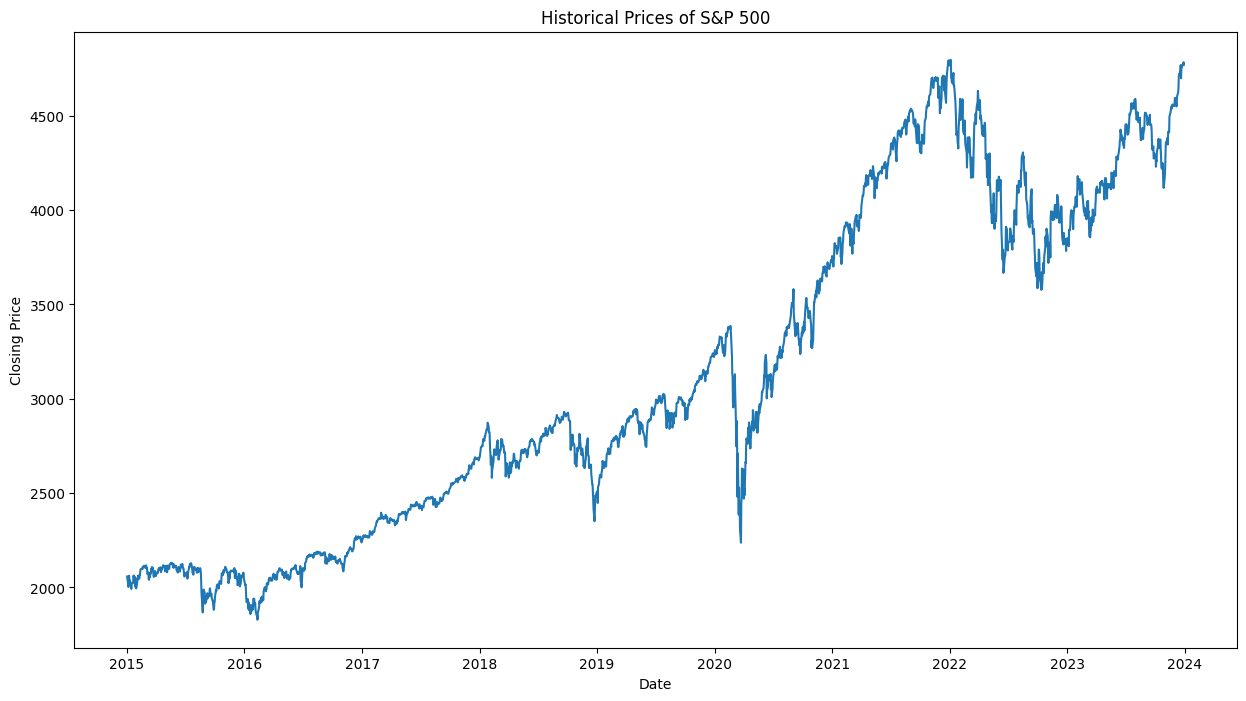

In [9]:
# Plot Historial Prices
plt.figure(figsize=(15, 8))
plt.plot(df['Close'])
plt.title('Historical Prices of S&P 500')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

## 5. ARIMA

In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from itertools import product
import warnings
warnings.filterwarnings('ignore')


In [11]:
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.418372
p-value: 0.906986


Hypothesis test results indicate insufficient evidence to reject the null hypothesis at a significance level of 0.05. Additionally, the time series exhibits non-stationarity.

ADF Statistic: -14.836716
p-value: 0.000000


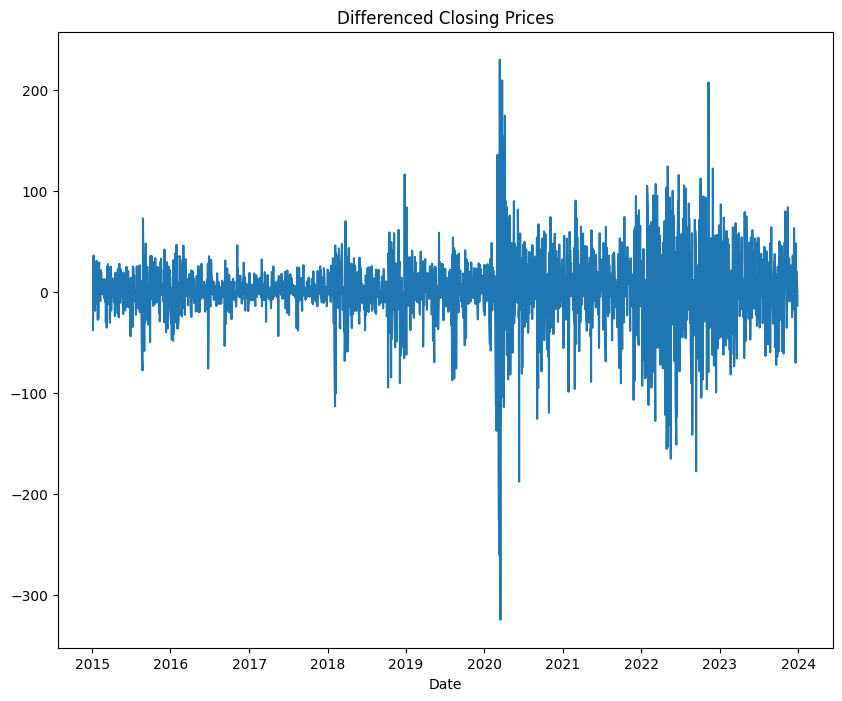

In [12]:
df_diff = df['Close'].diff().dropna()

# Recheck for stationarity
result = adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot differenced data
plt.figure(figsize=(10, 8))
plt.plot(df_diff)
plt.title('Differenced Closing Prices')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

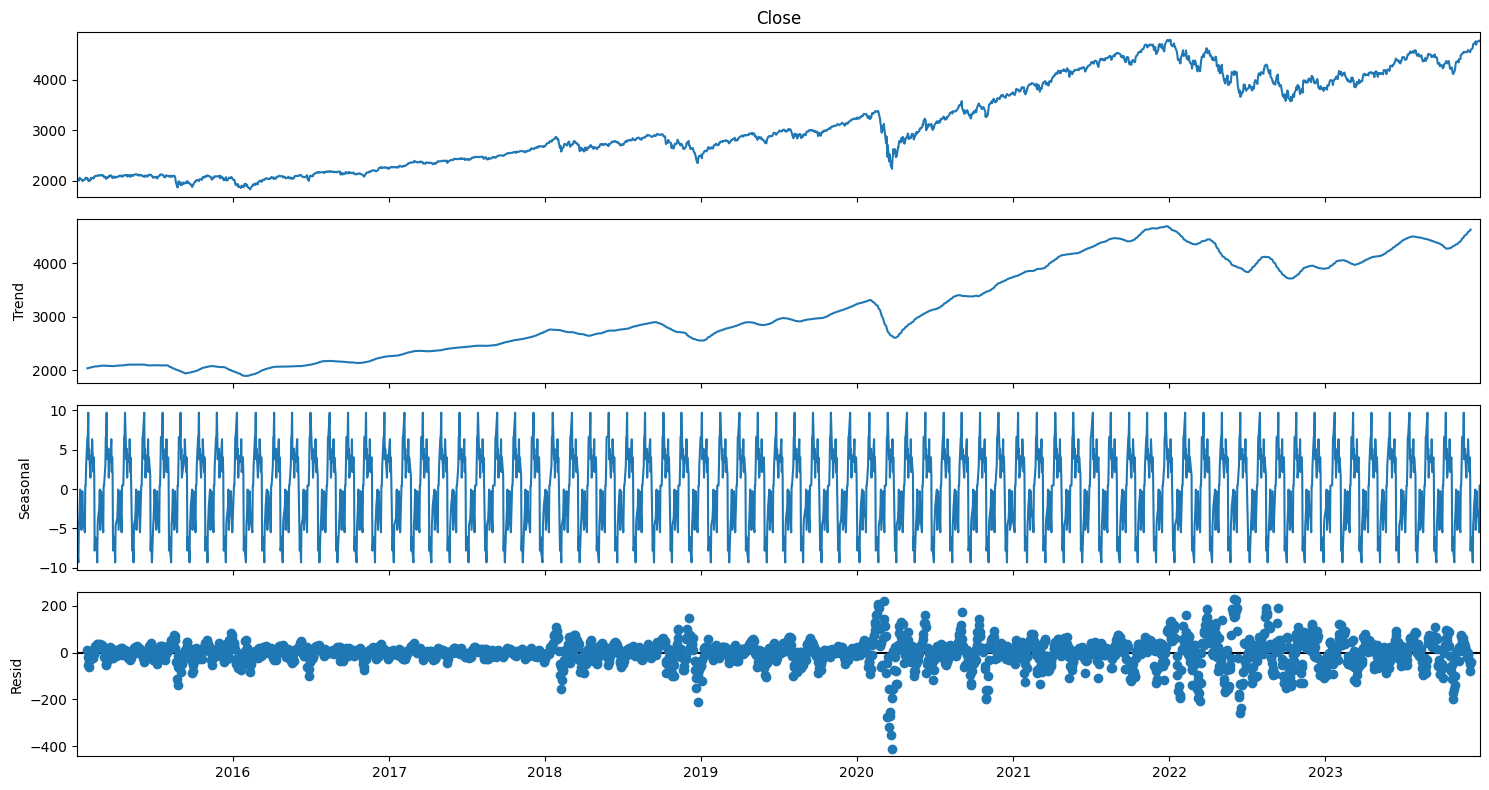

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
plt.rcParams["figure.figsize"] = [15, 8]
fig = decomposition.plot()

In [14]:
import pmdarima as pm

# Best ARIMA parameters
auto_arima_model = pm.auto_arima(df.Close,
                              start_p=0, start_q=0,
                              max_p=5, max_q=5,
                              seasonal=True,
                              stepwise=True,
                              suppress_warnings=True,
                              d=0,
                              trace=True)

print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=37082.833, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=43034.728, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=22726.299, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=22723.076, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=22723.479, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=22723.245, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=22721.751, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=22722.187, Time=0.40 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=29740.146, Time=1.14 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=22694.713, Time=0.86 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2

In [15]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2264
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -11316.701
Date:                Thu, 04 Jul 2024   AIC                          22647.403
Time:                        19:10:17   BIC                          22687.477
Sample:                             0   HQIC                         22662.025
                               - 2264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7191     12.353      0.220      0.826     -21.493      26.931
ar.L1         -0.7662      0.018    -42.238      0.000      -0.802      -0.731
ar.L2          0.8757      0.006    145.910      0.000       0.864       0.887
ar.L3          0.8897      0.017     52.432      0.000       0.856       0.923
ma.L1          1.6959      0.023     73.710      0.000       1.651       1.741
ma.L2          0.7993      0.022     36.582      0.000       0.756       0.842
sigma2      1285.1447     20.735     61.981      0.000    1244.506    1325.784
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              3745.11
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               7.95   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split Train and test

In [16]:
Train_end = 1763 #Index

# Create Train and Test
train = df.Close[:Train_end]
test = df.Close[Train_end:]

In [17]:
# ARIMA model

best_p, best_d, best_q = auto_arima_model.order
arima_model = ARIMA(train, order=(best_p, best_d, best_q))
arima_model_fit = arima_model.fit()


In [18]:
# Forecast

fc_arima = arima_model_fit.forecast(501, alpha=0.05)  
fc_arima.index = test.index

### Arima Prediction

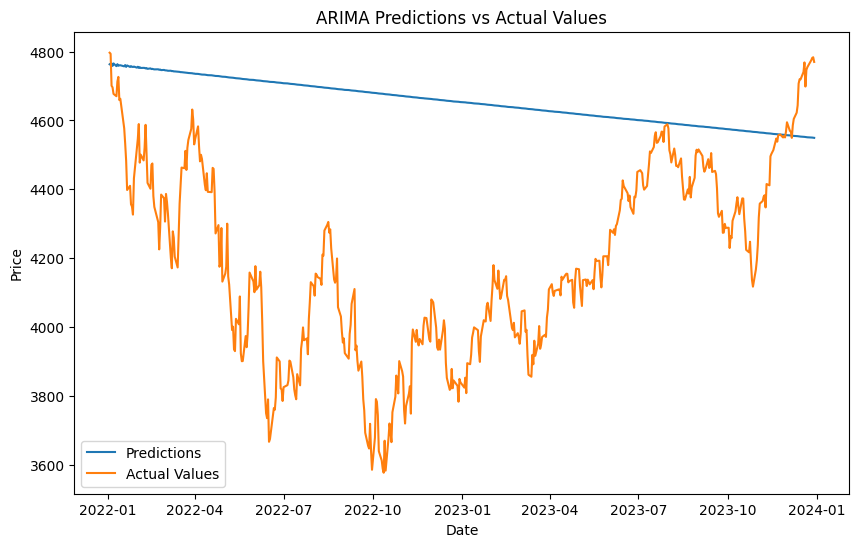

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(fc_arima, label='Predictions')
plt.plot(test, label='Actual Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Predictions vs Actual Values')
plt.legend()

plt.show()

## 6. Simple Recurrent Neural Networks (RNN)

### Train Test Split

In [20]:
train_end = 1763 #Index

train_data = df['Close'][:train_end]
test_data = df['Close'][train_end:]

### Reshape Train and Test

In [21]:
#Reshape train
dataset_train = train_data.values
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape


(1763, 1)

In [22]:
#Reshape train
dataset_test = test_data.values
dataset_test = np.reshape(dataset_test, (-1,1))
dataset_test.shape


(501, 1)

### Standardize the data


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.fit_transform(dataset_test)

In [24]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])

In [25]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])


In [26]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (1713, 50, 1) y_train : (1713, 1)


In [27]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (451, 50, 1) y_test : (451, 1)


In [28]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


2024-07-04 19:10:18.955561: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-04 19:10:19.061132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 19:10:19.111898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 19:10:19.112221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-04 19:10:19.185591: I tensorflow/core/platform/cpu_feature_gua

### RNN Model

In [29]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								decay=1e-6, 
								momentum=0.9, 
								nesterov=True), 
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20


2024-07-04 19:10:20.654500: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-04 19:10:20.753028: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


857/857 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 0.0107
Epoch 2/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0013
Epoch 3/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 9.5210e-04
Epoch 4/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 9.0295e-04
Epoch 5/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 7.2266e-04
Epoch 6/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 7.1496e-04
Epoch 7/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 7.2399e-04
Epoch 8/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 5.9556e-04
Epoch 9/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 7.0790e-04
Epoch 10/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 5.6945e-04
Epoch 11/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 4.7575e-04
Epoch 12/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 4.9299e-04
Epoch 13/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 4.6245e-04
Epoch 14/20
857/857 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 4.4

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

## 7. Long short-term memory (LSTM)

In [30]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 9.3927e-04 - loss: 0.0087
Epoch 2/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0020 - loss: 8.5150e-04
Epoch 3/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0021 - loss: 4.1361e-04
Epoch 4/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 9.3698e-04 - loss: 3.7717e-04
Epoch 5/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0028 - loss: 3.1055e-04
Epoch 6/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 9.6754e-04 - loss: 2.9433e-04
Epoch 7/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0019 - loss: 2.7921e-04
Epoch 8/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 2.9833e-04 - loss: 3.5377e-04
Epoch 9/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0018 - loss: 2.6766e-04
Epoch 10/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0013 - loss: 2.5124e-04
Epoch 11/12
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [31]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


### Scaling Back

In [32]:
y_RNN_inv = scaler.inverse_transform(y_RNN) 
y_LSTM_inv = scaler.inverse_transform(y_LSTM) 


### Predicted Prices

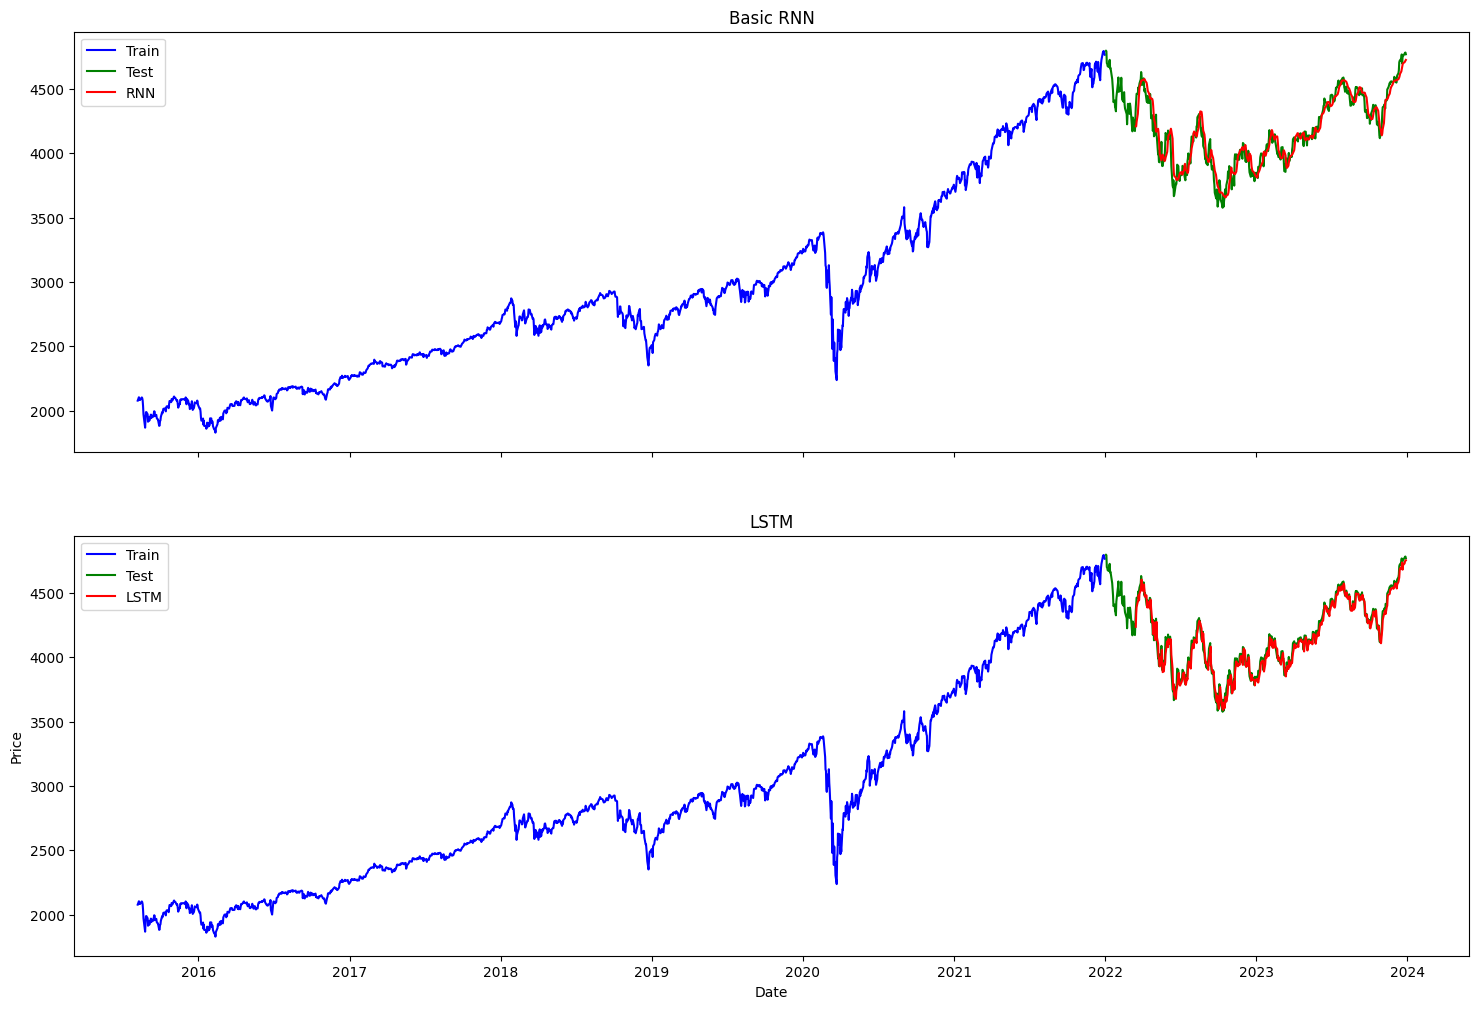

In [38]:
fig, axs = plt.subplots(2,figsize =(18,12),sharex=True, sharey=True)

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data[150:], label = "Train", color = "b")
axs[0].plot(test_data.index, test_data, label = "Test", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_inv, label = "RNN", color = "r")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data[150:], label = "Train", color = "b")
axs[1].plot(test_data.index, test_data, label = "Test", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_inv, label = "LSTM", color = "r")
axs[1].legend()
axs[1].title.set_text("LSTM")

plt.xlabel("Date")
plt.ylabel("Price")

plt.show()


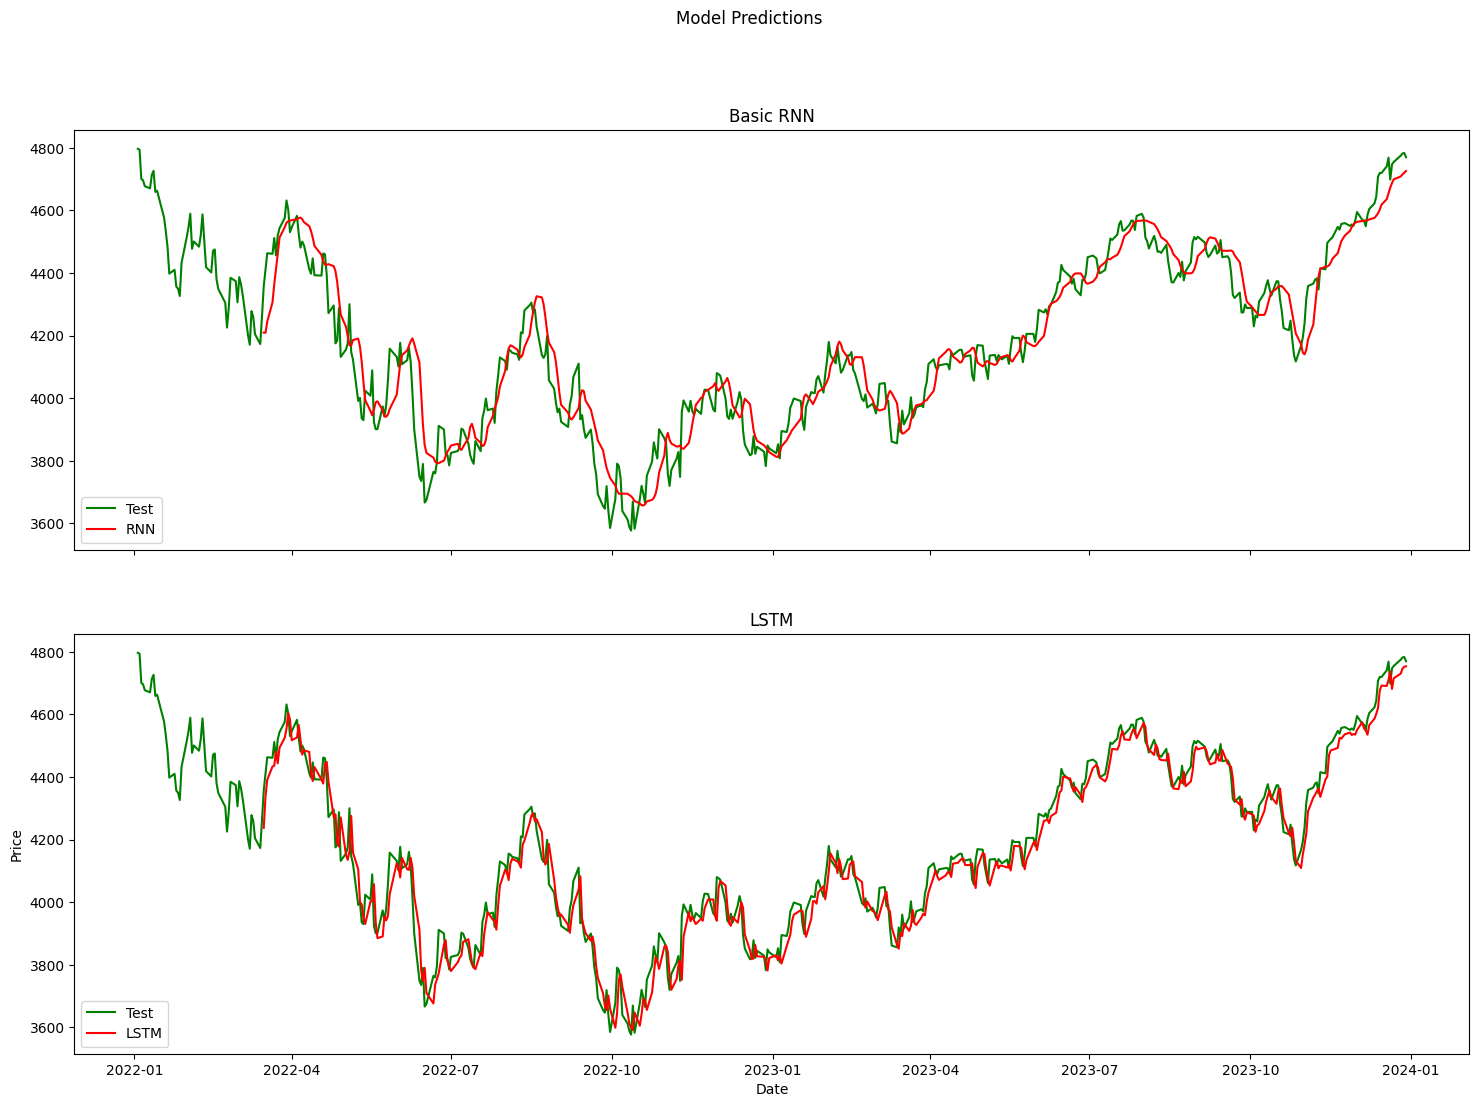

In [39]:
fig, axs = plt.subplots(2,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(test_data.index, test_data, label = "Test", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_inv, label = "RNN", color = "r")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(test_data.index, test_data, label = "Test", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_inv, label = "LSTM", color = "r")
axs[1].legend()
axs[1].title.set_text("LSTM")

plt.xlabel("Date")
plt.ylabel("Price")

plt.show()


## Conclusion

This project has demonstrated the power and potential of deep learning techniques, particularly Long Short-Term Memory (LSTM) networks, in forecasting stock market trends. By comparing ARIMA, a simple RNN, and LSTM models in predicting S&P 500 index prices, we have gained valuable insights into the strengths and limitations of each approach.

The superior performance of the LSTM model underscores the importance of capturing long-term dependencies and non-linear patterns in financial time series data. While traditional statistical methods like ARIMA provide a solid baseline and the simple RNN shows promise in learning temporal patterns, the LSTM's ability to retain relevant information over extended periods proved crucial in achieving more accurate predictions.
This study contributes to the growing body of evidence supporting the application of advanced machine learning techniques in financial forecasting. The results suggest that deep learning models, when properly implemented and trained, can offer significant advantages over traditional forecasting methods.
However, it's important to note that no forecasting model is infallible, especially in the inherently unpredictable realm of financial markets. External factors, unforeseen events, and market sentiment can all influence stock prices in ways that may not be captured by historical data alone.
Moving forward, this project opens up several avenues for future research, including:

- Exploring hybrid models that combine statistical and deep learning approaches.
- Incorporating additional relevant features such as economic indicators or sentiment analysis.
- Investigating the impact of different time horizons on model performance.
- Applying these techniques to individual stocks or other financial instruments.